In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# pip install openpyxl
import openpyxl

In [2]:
data = pd.read_excel("/content/stroke_prediction_dataset.xlsx")

In [3]:
data

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,13981,Keya Iyer,88,Female,1,1,Divorced,Self-employed,Urban,160.22,...,Social Drinker,High,0,No,Paleo,1.12,171/92,"HDL: 44, LDL: 153",NaN,No Stroke
14996,87707,Anahita Virk,47,Female,0,0,Married,Private,Urban,107.58,...,Never,Low,1,No,Gluten-Free,1.47,155/71,"HDL: 35, LDL: 183",Difficulty Speaking,No Stroke
14997,33174,Ivana Kaur,35,Male,0,0,Married,Government Job,Rural,134.90,...,Rarely,High,1,No,Paleo,0.51,121/110,"HDL: 57, LDL: 159","Difficulty Speaking, Severe Fatigue, Headache",Stroke
14998,22343,Anvi Mannan,73,Male,0,0,Single,Self-employed,Urban,169.42,...,Never,High,0,Yes,Paleo,1.53,157/74,"HDL: 79, LDL: 91","Severe Fatigue, Numbness, Confusion, Dizziness...",No Stroke


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient ID                15000 non-null  int64  
 1   Patient Name              15000 non-null  object 
 2   Age                       15000 non-null  int64  
 3   Gender                    15000 non-null  object 
 4   Hypertension              15000 non-null  int64  
 5   Heart Disease             15000 non-null  int64  
 6   Marital Status            15000 non-null  object 
 7   Work Type                 15000 non-null  object 
 8   Residence Type            15000 non-null  object 
 9   Average Glucose Level     15000 non-null  float64
 10  Body Mass Index (BMI)     15000 non-null  float64
 11  Smoking Status            15000 non-null  object 
 12  Alcohol Intake            15000 non-null  object 
 13  Physical Activity         15000 non-null  object 
 14  Stroke

In [5]:
data.sample(4)

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
10971,35862,Taimur Dube,52,Female,0,1,Single,Government Job,Urban,110.61,...,Rarely,Low,0,No,Gluten-Free,3.42,174/87,"HDL: 53, LDL: 171","Blurred Vision, Headache",Stroke
6345,87619,Onkar Seth,82,Female,0,1,Divorced,Never Worked,Rural,153.32,...,Rarely,Moderate,1,Yes,Gluten-Free,0.07,158/72,"HDL: 55, LDL: 71",NaN,No Stroke
9889,67846,Renee Rege,21,Female,1,1,Divorced,Government Job,Urban,109.96,...,Rarely,High,0,Yes,Vegetarian,9.05,128/86,"HDL: 70, LDL: 134","Severe Fatigue, Confusion, Severe Fatigue, Los...",Stroke
4524,75862,Drishya Chander,85,Female,0,1,Married,Never Worked,Urban,133.19,...,Rarely,Low,1,Yes,Paleo,9.40,101/61,"HDL: 45, LDL: 167",NaN,Stroke


In [6]:
data.columns

Index(['Patient ID', 'Patient Name', 'Age', 'Gender', 'Hypertension',
       'Heart Disease', 'Marital Status', 'Work Type', 'Residence Type',
       'Average Glucose Level', 'Body Mass Index (BMI)', 'Smoking Status',
       'Alcohol Intake', 'Physical Activity', 'Stroke History',
       'Family History of Stroke', 'Dietary Habits', 'Stress Levels',
       'Blood Pressure Levels', 'Cholesterol Levels', 'Symptoms', 'Diagnosis'],
      dtype='object')

In [7]:
data.describe()

,Patient ID,Age,Hypertension,Heart Disease,Average Glucose Level,Body Mass Index (BMI),Stroke History,Stress Levels
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,49715.802867,54.035667,0.249000,0.502933,129.445209,27.474302,0.500267,5.022694
std,29000.656642,21.063111,0.432448,0.500008,40.487792,7.230201,0.500017,2.873223
min,1.000000,18.000000,0.000000,0.000000,60.000000,15.010000,0.000000,0.000000
25%,24562.000000,36.000000,0.000000,0.000000,94.517500,21.160000,0.000000,2.540000
50%,49448.000000,54.000000,0.000000,1.000000,128.900000,27.420000,1.000000,5.050000
75%,75112.000000,72.000000,0.000000,1.000000,164.592500,33.720000,1.000000,7.520000
max,99975.000000,90.000000,1.000000,1.000000,200.000000,40.000000,1.000000,10.000000


In [8]:
data.shape

(15000, 22)

# Data Cleaning
* Handle missing values
* outliers

In [9]:
data.isna().sum()

Patient ID                     0
Patient Name                   0
Age                            0
Gender                         0
Hypertension                   0
Heart Disease                  0
Marital Status                 0
Work Type                      0
Residence Type                 0
Average Glucose Level          0
Body Mass Index (BMI)          0
Smoking Status                 0
Alcohol Intake                 0
Physical Activity              0
Stroke History                 0
Family History of Stroke       0
Dietary Habits                 0
Stress Levels                  0
Blood Pressure Levels          0
Cholesterol Levels             0
Symptoms                    2500
Diagnosis                      0
dtype: int64

In [10]:
data['Symptoms'].fillna('Missing', inplace=True)

In [11]:
data

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,13981,Keya Iyer,88,Female,1,1,Divorced,Self-employed,Urban,160.22,...,Social Drinker,High,0,No,Paleo,1.12,171/92,"HDL: 44, LDL: 153",Missing,No Stroke
14996,87707,Anahita Virk,47,Female,0,0,Married,Private,Urban,107.58,...,Never,Low,1,No,Gluten-Free,1.47,155/71,"HDL: 35, LDL: 183",Difficulty Speaking,No Stroke
14997,33174,Ivana Kaur,35,Male,0,0,Married,Government Job,Rural,134.90,...,Rarely,High,1,No,Paleo,0.51,121/110,"HDL: 57, LDL: 159","Difficulty Speaking, Severe Fatigue, Headache",Stroke
14998,22343,Anvi Mannan,73,Male,0,0,Single,Self-employed,Urban,169.42,...,Never,High,0,Yes,Paleo,1.53,157/74,"HDL: 79, LDL: 91","Severe Fatigue, Numbness, Confusion, Dizziness...",No Stroke


* Outliers detection

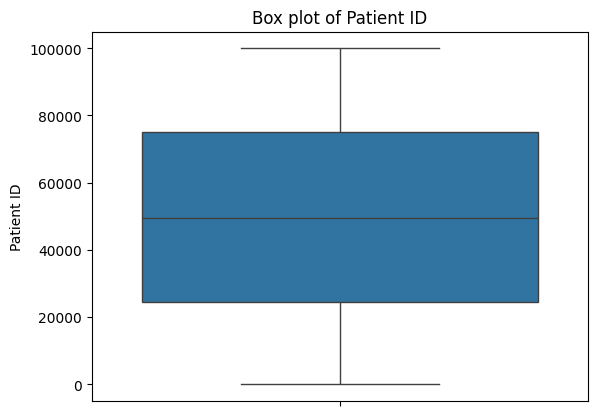

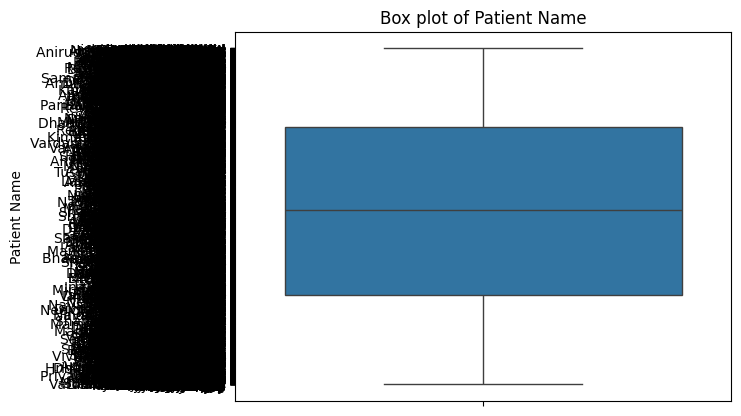

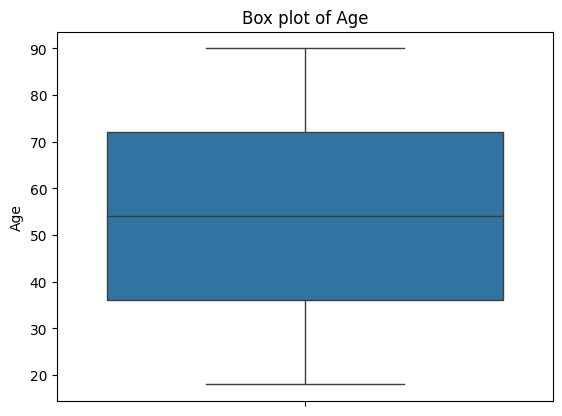

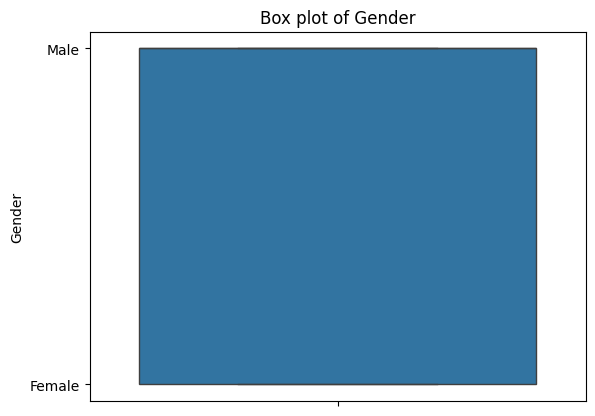

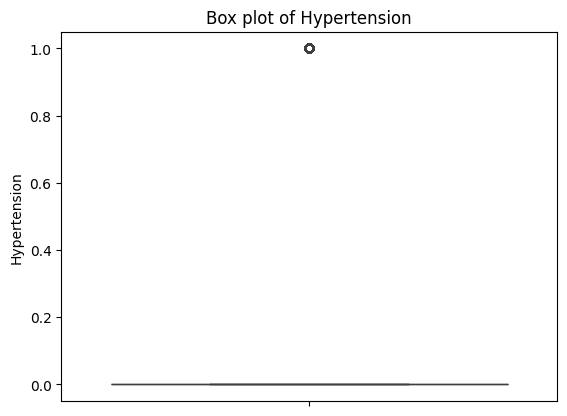

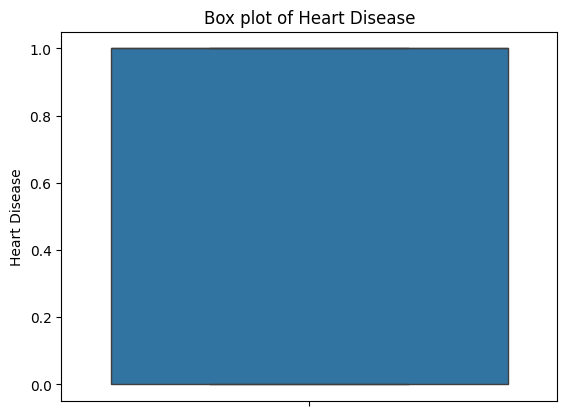

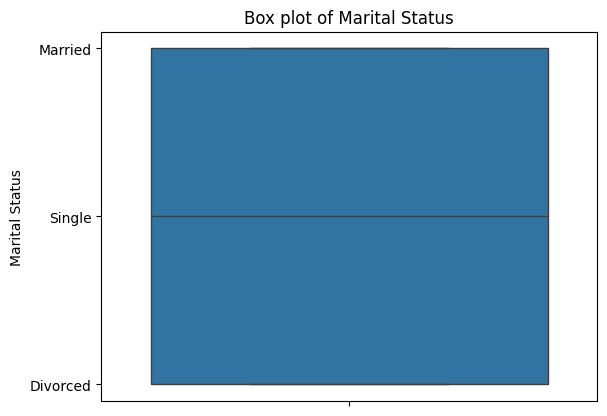

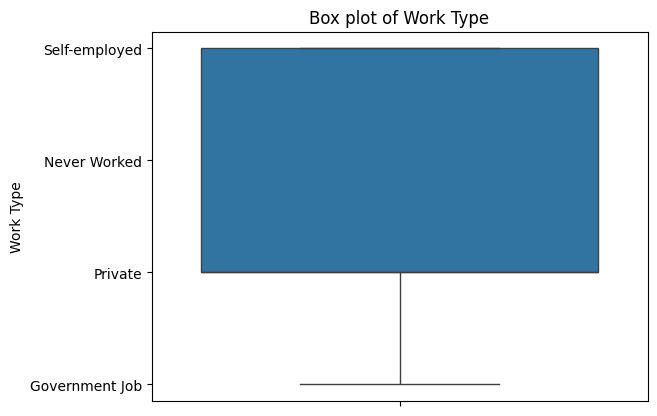

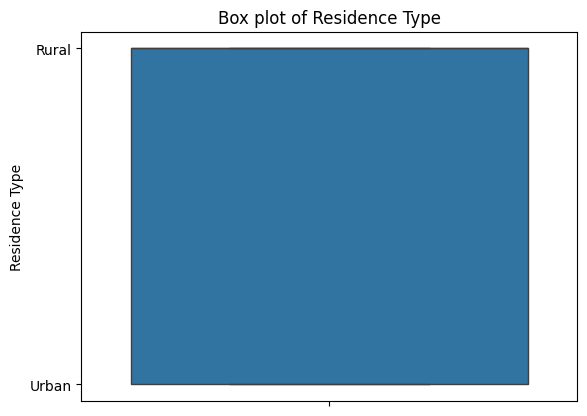

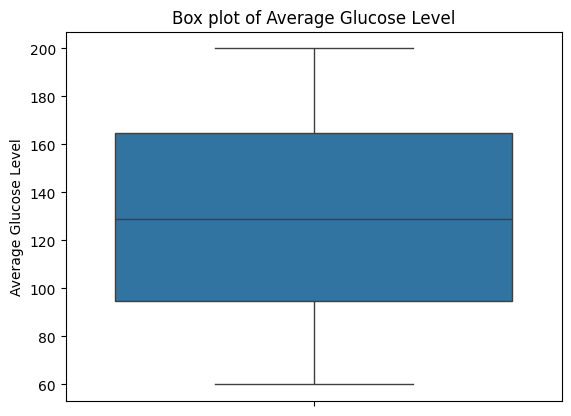

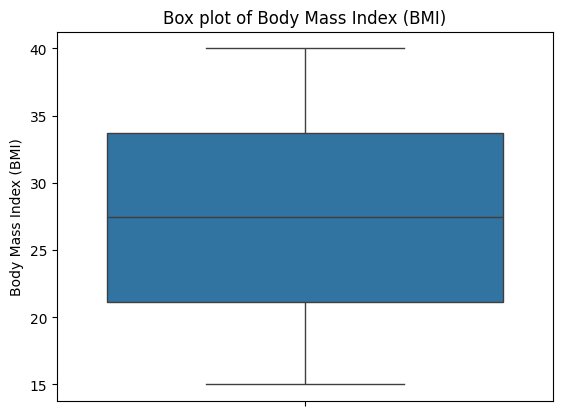

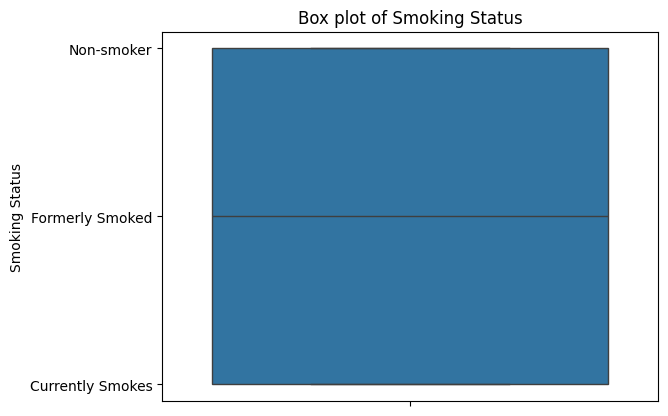

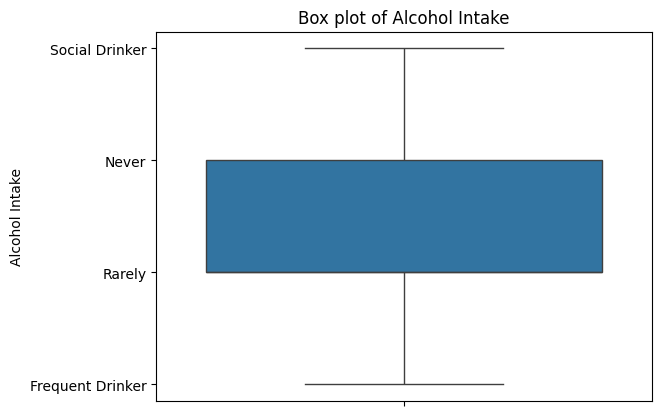

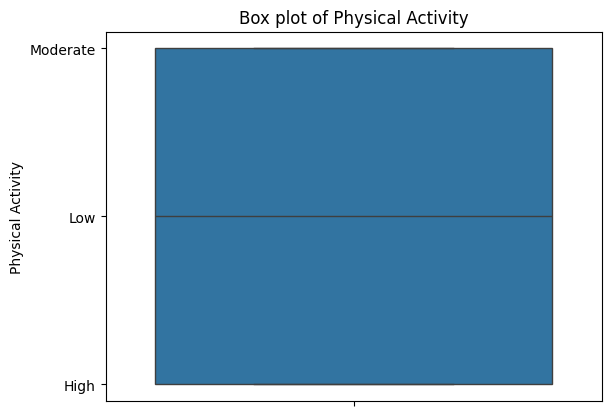

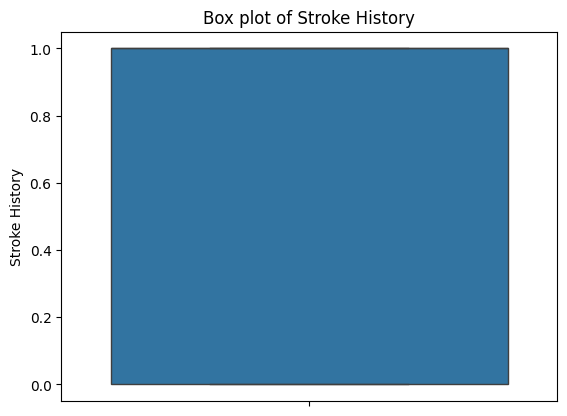

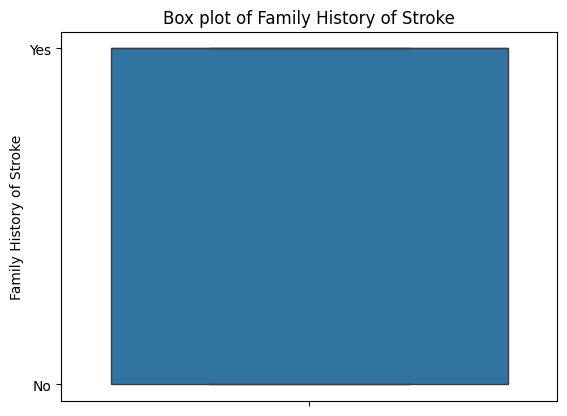

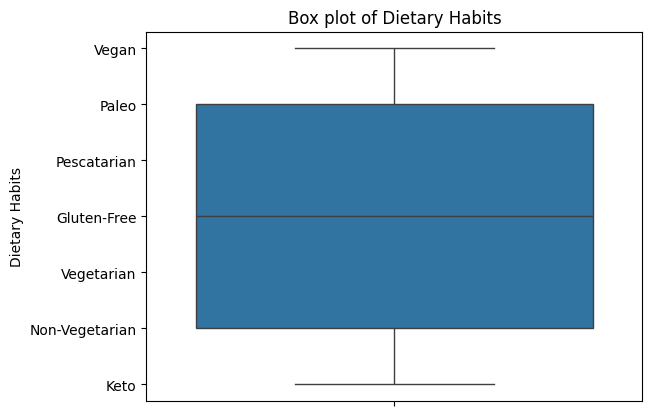

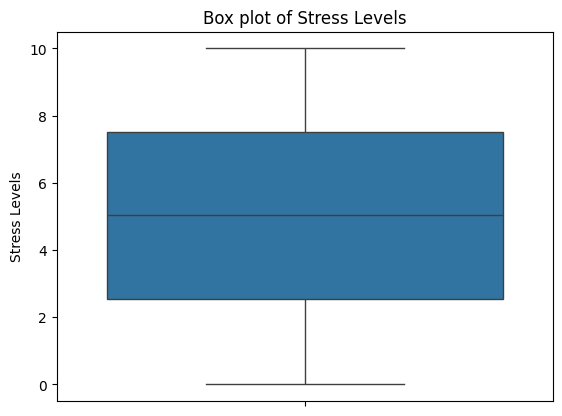

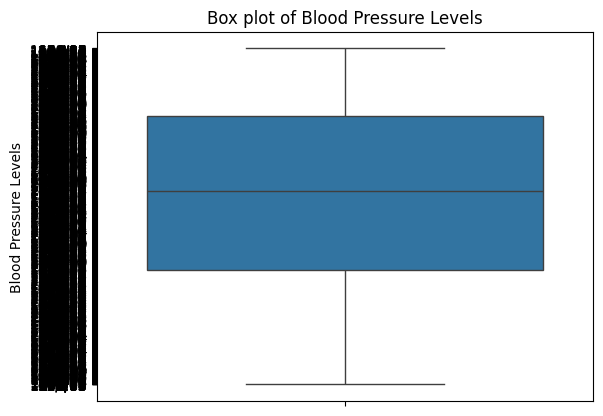

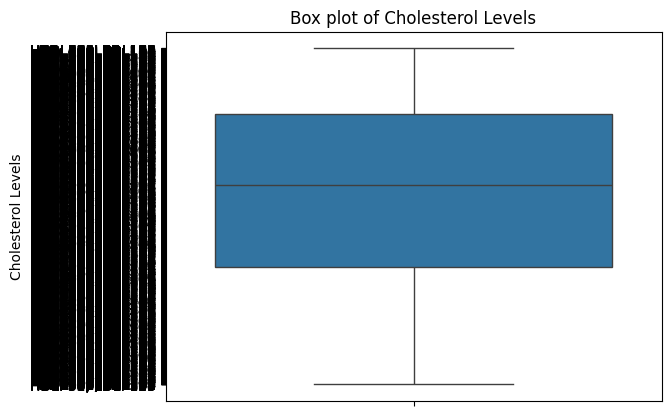

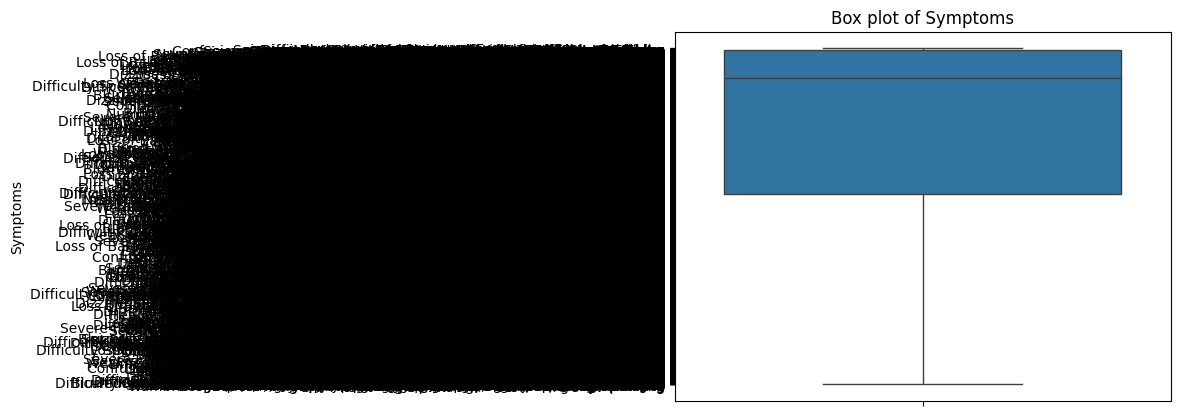

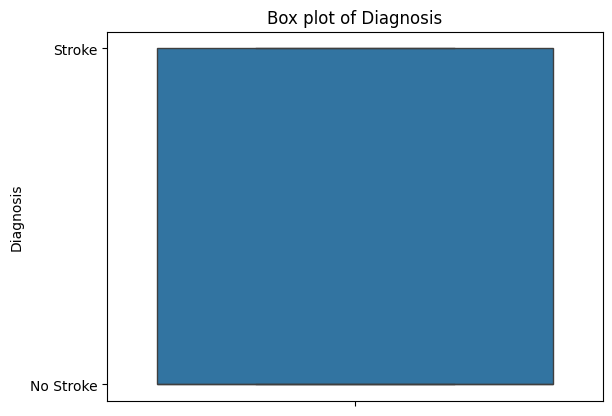

In [12]:
for column in data.columns:
  sns.boxplot(y = data[column])
  plt.title(f'Box plot of {column}')
  plt.ylabel(column)
  plt.show()

* finding relation with **diagnosis** column

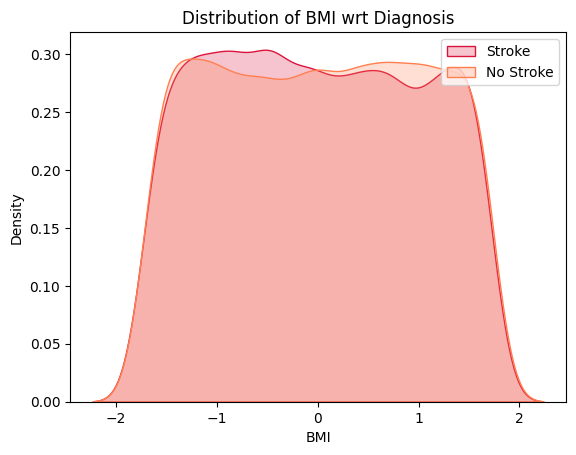

In [66]:
sns.kdeplot(data.loc[data['Diagnosis'] == 1]['Body Mass Index (BMI)'], color='crimson', label='Stroke', fill=True)
sns.kdeplot(data.loc[data['Diagnosis'] == 0]['Body Mass Index (BMI)'], color='coral', label='No Stroke', fill=True)
plt.title('Distribution of BMI wrt Diagnosis')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()

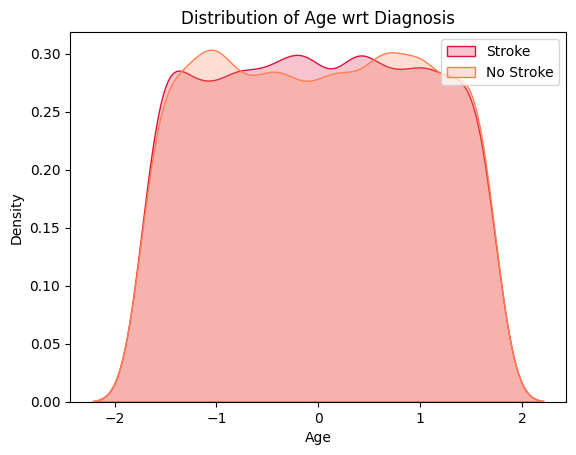

In [67]:
sns.kdeplot(data.loc[data['Diagnosis'] == 1]['Age'], color='crimson', label='Stroke', fill=True)
sns.kdeplot(data.loc[data['Diagnosis'] == 0]['Age'], color='coral', label='No Stroke', fill=True)
plt.title('Distribution of Age wrt Diagnosis')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()

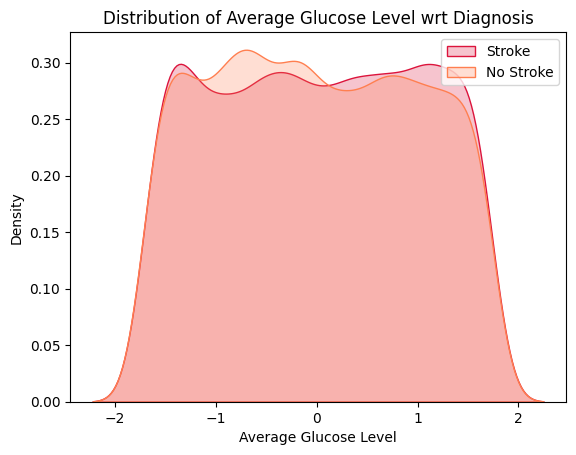

In [68]:
sns.kdeplot(data.loc[data['Diagnosis'] == 1]['Average Glucose Level'], color='crimson', label='Stroke', fill=True)
sns.kdeplot(data.loc[data['Diagnosis'] == 0]['Average Glucose Level'], color='coral', label='No Stroke', fill=True)
plt.title('Distribution of Average Glucose Level wrt Diagnosis')
plt.xlabel('Average Glucose Level')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()

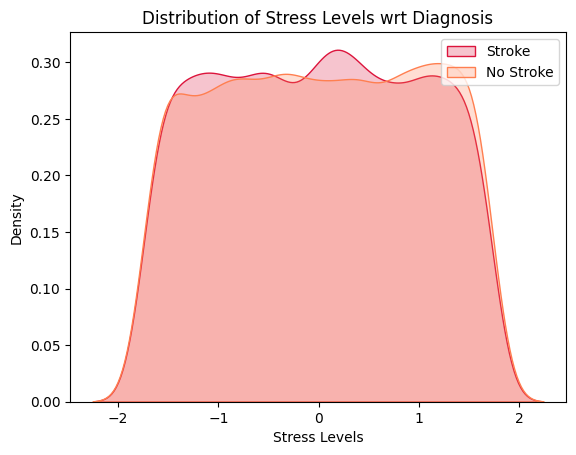

In [69]:
sns.kdeplot(data.loc[data['Diagnosis'] == 1]['Stress Levels'], color='crimson', label='Stroke', fill=True)
sns.kdeplot(data.loc[data['Diagnosis'] == 0]['Stress Levels'], color='coral', label='No Stroke', fill=True)
plt.title('Distribution of Stress Levels wrt Diagnosis')
plt.xlabel('Stress Levels')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()

# Feature Creation

In [17]:
data[['Systolic BP', 'Diastolic BP']] = data['Blood Pressure Levels'].str.split('/', expand=True).astype(int)

In [18]:
data[['HDL', 'LDL']] = data['Cholesterol Levels'].str.extract(r'HDL: (\d+), LDL: (\d+)').astype(int)
data.head(2)

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis,Systolic BP,Diastolic BP,HDL,LDL
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke,140,108,68,133
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke,146,91,63,70


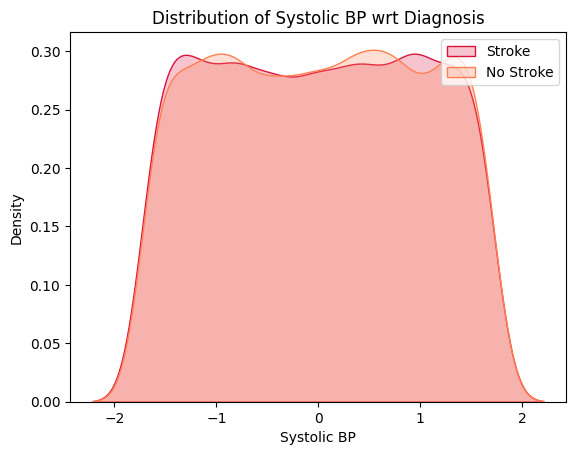

In [70]:
sns.kdeplot(data.loc[data['Diagnosis'] == 1]['Systolic BP'], color='crimson', label='Stroke', fill=True)
sns.kdeplot(data.loc[data['Diagnosis'] == 0]['Systolic BP'], color='coral', label='No Stroke', fill=True)
plt.title('Distribution of Systolic BP wrt Diagnosis')
plt.xlabel('Systolic BP')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()

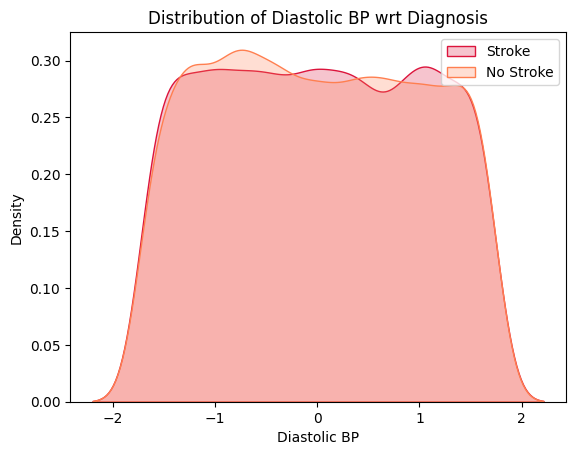

In [71]:
sns.kdeplot(data.loc[data['Diagnosis'] == 1]['Diastolic BP'], color='crimson', label='Stroke', fill=True)
sns.kdeplot(data.loc[data['Diagnosis'] == 0]['Diastolic BP'], color='coral', label='No Stroke', fill=True)
plt.title('Distribution of Diastolic BP wrt Diagnosis')
plt.xlabel('Diastolic BP')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()

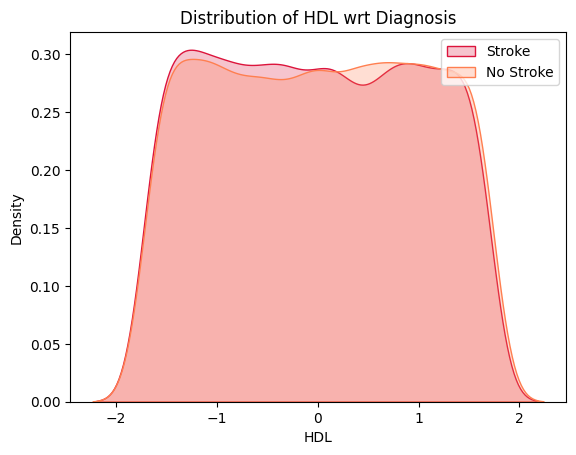

In [72]:
sns.kdeplot(data.loc[data['Diagnosis'] == 1]['HDL'], color='crimson', label='Stroke', fill=True)
sns.kdeplot(data.loc[data['Diagnosis'] == 0]['Body Mass Index (BMI)'], color='coral', label='No Stroke', fill=True)
plt.title('Distribution of HDL wrt Diagnosis')
plt.xlabel('HDL')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()

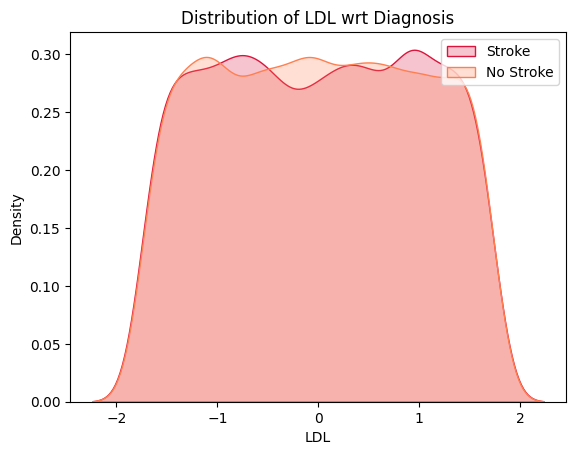

In [73]:
sns.kdeplot(data.loc[data['Diagnosis'] == 1]['LDL'], color='crimson', label='Stroke', fill=True)
sns.kdeplot(data.loc[data['Diagnosis'] == 0]['LDL'], color='coral', label='No Stroke', fill=True)
plt.title('Distribution of LDL wrt Diagnosis')
plt.xlabel('LDL')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()

In [23]:
symptoms_list = data['Symptoms'].str.split(', ').tolist()
all_symptoms = set([item for sublist in symptoms_list for item in sublist])
all_symptoms

{'Blurred Vision',
 'Confusion',
 'Difficulty Speaking',
 'Dizziness',
 'Headache',
 'Loss of Balance',
 'Missing',
 'Numbness',
 'Seizures',
 'Severe Fatigue',
 'Weakness'}

In [24]:
for symptom in all_symptoms:
    data[symptom] = data['Symptoms'].apply(lambda x : symptom in x)

In [25]:
data.columns

Index(['Patient ID', 'Patient Name', 'Age', 'Gender', 'Hypertension',
       'Heart Disease', 'Marital Status', 'Work Type', 'Residence Type',
       'Average Glucose Level', 'Body Mass Index (BMI)', 'Smoking Status',
       'Alcohol Intake', 'Physical Activity', 'Stroke History',
       'Family History of Stroke', 'Dietary Habits', 'Stress Levels',
       'Blood Pressure Levels', 'Cholesterol Levels', 'Symptoms', 'Diagnosis',
       'Systolic BP', 'Diastolic BP', 'HDL', 'LDL', 'Blurred Vision',
       'Headache', 'Weakness', 'Missing', 'Numbness', 'Loss of Balance',
       'Seizures', 'Severe Fatigue', 'Dizziness', 'Confusion',
       'Difficulty Speaking'],
      dtype='object')

In [26]:
t = data[['Symptoms','Blurred Vision', 'Severe Fatigue','Weakness', 'Numbness',
       'Difficulty Speaking', 'Missing', 'Dizziness', 'Seizures', 'Confusion',
       'Headache', 'Loss of Balance']]
t

,Symptoms,Blurred Vision,Severe Fatigue,Weakness,Numbness,Difficulty Speaking,Missing,Dizziness,Seizures,Confusion,Headache,Loss of Balance
0,"Difficulty Speaking, Headache",False,False,False,False,True,False,False,False,False,True,False
1,"Loss of Balance, Headache, Dizziness, Confusion",False,False,False,False,False,False,True,False,True,True,True
2,"Seizures, Dizziness",False,False,False,False,False,False,True,True,False,False,False
3,"Seizures, Blurred Vision, Severe Fatigue, Head...",True,True,False,False,False,False,False,True,True,True,False
4,Difficulty Speaking,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Missing,False,False,False,False,False,True,False,False,False,False,False
14996,Difficulty Speaking,False,False,False,False,True,False,False,False,False,False,False
14997,"Difficulty Speaking, Severe Fatigue, Headache",False,True,False,False,True,False,False,False,False,True,False
14998,"Severe Fatigue, Numbness, Confusion, Dizziness...",False,True,False,True,False,False,True,False,True,False,True


In [27]:
data = data.drop(['Patient ID', 'Patient Name','Symptoms','Cholesterol Levels','Blood Pressure Levels'], axis=1)

In [28]:
data.head(2)

,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,...,Headache,Weakness,Missing,Numbness,Loss of Balance,Seizures,Severe Fatigue,Dizziness,Confusion,Difficulty Speaking
0,56,Male,0,1,Married,Self-employed,Rural,130.91,22.37,Non-smoker,...,True,False,False,False,False,False,False,False,False,True
1,80,Male,0,0,Single,Self-employed,Urban,183.73,32.57,Non-smoker,...,True,False,False,False,True,False,False,True,True,False


In [29]:
data.columns

Index(['Age', 'Gender', 'Hypertension', 'Heart Disease', 'Marital Status',
       'Work Type', 'Residence Type', 'Average Glucose Level',
       'Body Mass Index (BMI)', 'Smoking Status', 'Alcohol Intake',
       'Physical Activity', 'Stroke History', 'Family History of Stroke',
       'Dietary Habits', 'Stress Levels', 'Diagnosis', 'Systolic BP',
       'Diastolic BP', 'HDL', 'LDL', 'Blurred Vision', 'Headache', 'Weakness',
       'Missing', 'Numbness', 'Loss of Balance', 'Seizures', 'Severe Fatigue',
       'Dizziness', 'Confusion', 'Difficulty Speaking'],
      dtype='object')

# Feature Transformation
* Scalling
* skewness
* Binning

In [30]:
 data.describe()

,Age,Hypertension,Heart Disease,Average Glucose Level,Body Mass Index (BMI),Stroke History,Stress Levels,Systolic BP,Diastolic BP,HDL,LDL
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,54.035667,0.249000,0.502933,129.445209,27.474302,0.500267,5.022694,135.048467,84.897667,55.064933,125.054267
std,21.063111,0.432448,0.500008,40.487792,7.230201,0.500017,2.873223,26.367423,14.683872,14.845410,37.593233
min,18.000000,0.000000,0.000000,60.000000,15.010000,0.000000,0.000000,90.000000,60.000000,30.000000,60.000000
25%,36.000000,0.000000,0.000000,94.517500,21.160000,0.000000,2.540000,112.000000,72.000000,42.000000,92.000000
50%,54.000000,0.000000,1.000000,128.900000,27.420000,1.000000,5.050000,135.000000,85.000000,55.000000,125.000000
75%,72.000000,0.000000,1.000000,164.592500,33.720000,1.000000,7.520000,158.000000,98.000000,68.000000,158.000000
max,90.000000,1.000000,1.000000,200.000000,40.000000,1.000000,10.000000,180.000000,110.000000,80.000000,190.000000


In [31]:
numerical_cols = ['Age', 'Hypertension', 'Heart Disease', 'Average Glucose Level', 'Stress Levels',
                     'Systolic BP', 'Diastolic BP', 'HDL', 'LDL','Body Mass Index (BMI)']

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [35]:
data.sample(5)

,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,...,Headache,Weakness,Missing,Numbness,Loss of Balance,Seizures,Severe Fatigue,Dizziness,Confusion,Difficulty Speaking
13650,1.137777,Male,-0.575811,-1.005884,Married,Government Job,Rural,0.113737,-0.400321,Non-smoker,...,False,False,False,True,True,True,False,False,True,False
10926,-0.856296,Male,1.736682,0.994150,Divorced,Government Job,Urban,-0.065830,1.692360,Formerly Smoked,...,False,False,False,True,False,False,False,False,False,False
14090,0.662998,Male,-0.575811,0.994150,Married,Self-employed,Urban,-0.668007,-0.134759,Formerly Smoked,...,False,False,True,False,False,False,False,False,False,False
12627,-0.191605,Male,-0.575811,-1.005884,Single,Private,Rural,-1.675257,-0.566297,Formerly Smoked,...,False,False,False,False,False,False,False,False,False,False
277,-1.568466,Female,1.736682,-1.005884,Single,Government Job,Urban,-1.670811,-0.717058,Non-smoker,...,False,True,False,False,True,False,False,True,False,False


In [36]:
skewness = data[numerical_cols].skew()

In [37]:
skewness

Age                     -0.004150
Hypertension             1.160987
Heart Disease           -0.011735
Average Glucose Level    0.012069
Stress Levels           -0.012179
Systolic BP             -0.006012
Diastolic BP             0.023246
HDL                      0.006492
LDL                     -0.002478
Body Mass Index (BMI)    0.015617
dtype: float64

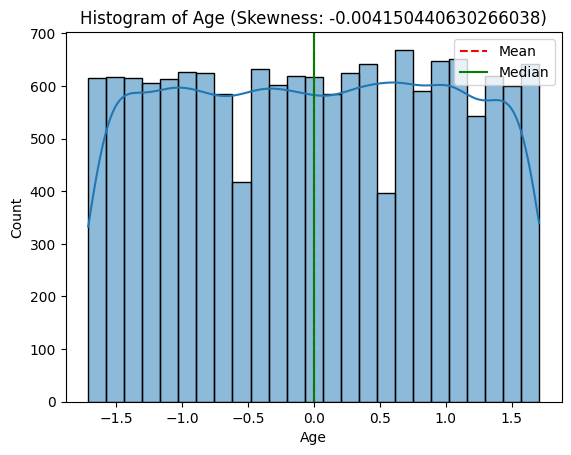

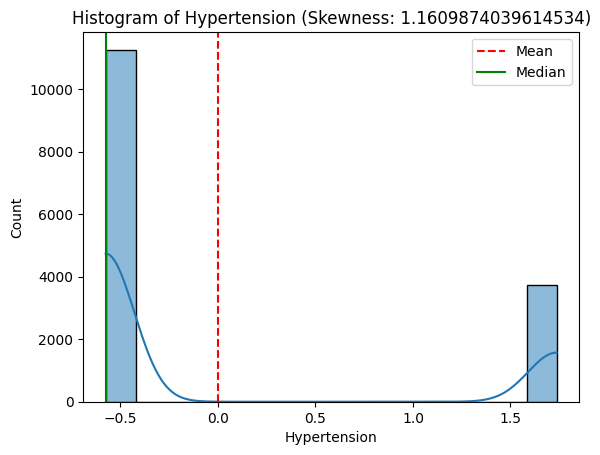

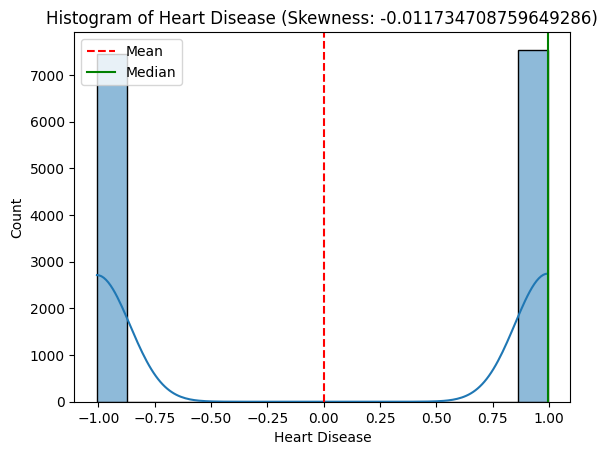

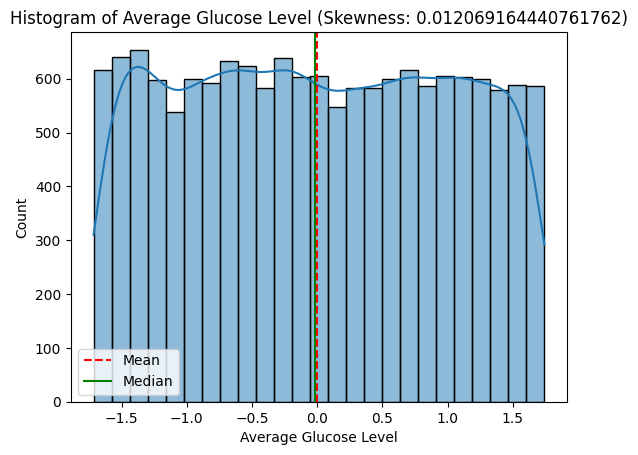

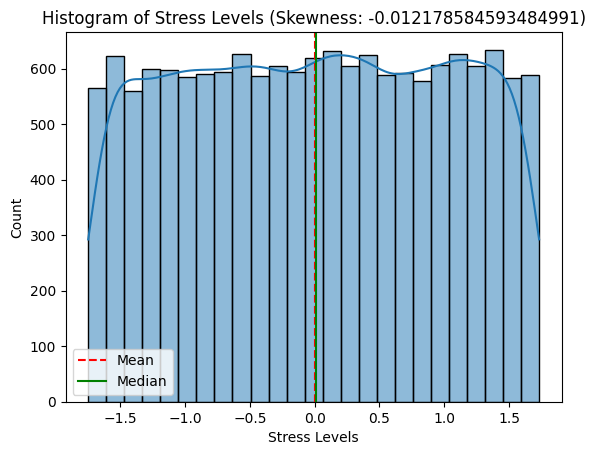

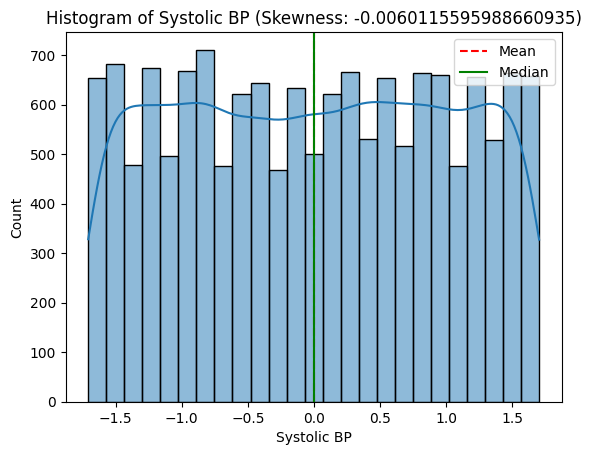

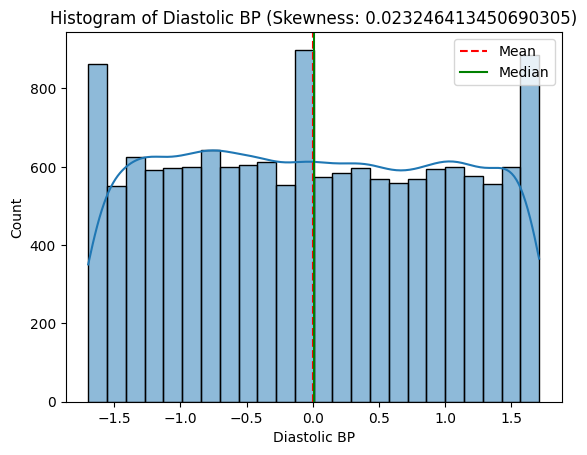

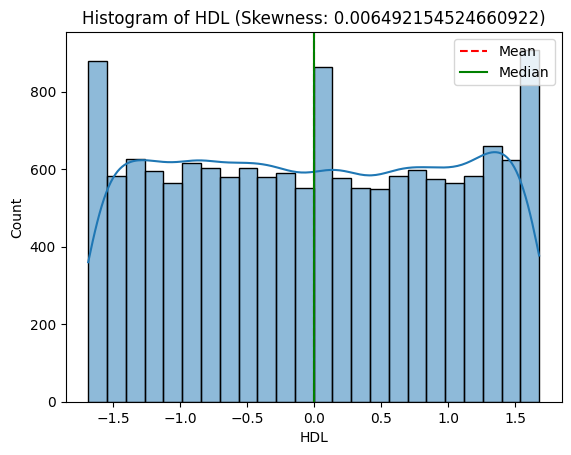

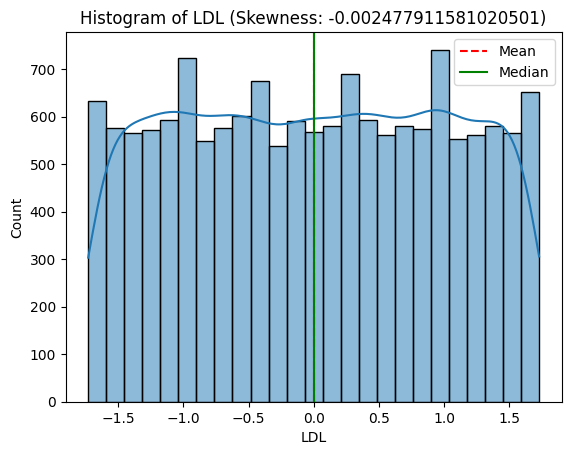

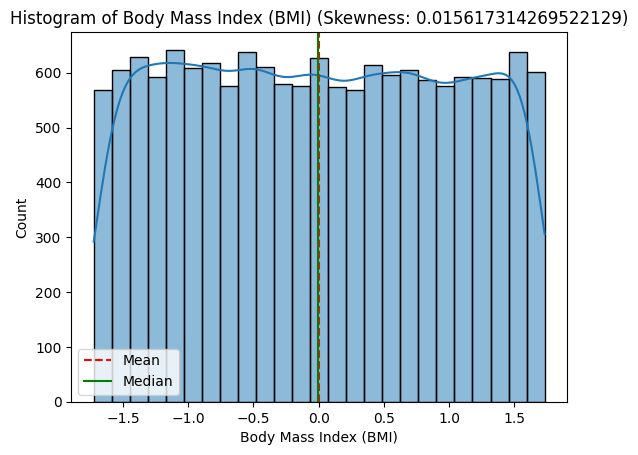

In [38]:
for col in data[numerical_cols].columns:
    plt.figure()
    sns.histplot(data[numerical_cols][col], kde=True)
    plt.axvline(data[numerical_cols][col].mean(), color='r', linestyle='--', label='Mean')
    plt.axvline(data[numerical_cols][col].median(), color='g', linestyle='-', label='Median')
    plt.title(f'Histogram of {col} (Skewness: {skewness[col]})')
    plt.legend()
    plt.show()

# Handle categorical columns

In [39]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Gender']= label_encoder.fit_transform(data['Gender'])
data['Residence Type']= label_encoder.fit_transform(data['Residence Type'])
data['Family History of Stroke']= label_encoder.fit_transform(data['Residence Type'])
data['Diagnosis']= label_encoder.fit_transform(data['Diagnosis'])

In [40]:
cat_features = data.select_dtypes(include=['object']).columns
cat_features

Index(['Marital Status', 'Work Type', 'Smoking Status', 'Alcohol Intake',
       'Physical Activity', 'Dietary Habits'],
      dtype='object')

In [41]:
data = pd.get_dummies(data, columns=cat_features, drop_first=True)

In [42]:
data.head()

,Age,Gender,Hypertension,Heart Disease,Residence Type,Average Glucose Level,Body Mass Index (BMI),Stroke History,Family History of Stroke,Stress Levels,...,Alcohol Intake_Rarely,Alcohol Intake_Social Drinker,Physical Activity_Low,Physical Activity_Moderate,Dietary Habits_Keto,Dietary Habits_Non-Vegetarian,Dietary Habits_Paleo,Dietary Habits_Pescatarian,Dietary Habits_Vegan,Dietary Habits_Vegetarian
0,0.093263,1,-0.575811,0.994150,0,0.036180,-0.705993,0,0,-0.536939,...,False,True,False,True,False,False,False,False,True,False
1,1.232733,1,-0.575811,-1.005884,1,1.340814,0.704803,0,1,-1.146031,...,False,False,True,False,False,False,True,False,False,False
2,-1.331076,1,1.736682,0.994150,0,1.470981,-0.989536,0,0,0.796103,...,True,False,False,False,False,False,True,False,False,False
3,0.900388,1,-0.575811,-1.005884,1,1.379345,0.003554,0,1,0.113920,...,False,False,False,True,False,False,True,False,False,False
4,-0.144127,1,1.736682,0.994150,1,1.182983,0.219323,0,1,0.632518,...,True,False,True,False,False,False,False,True,False,False


In [43]:
data = data.replace({True: 1, False: 0})

In [44]:
data.head()

,Age,Gender,Hypertension,Heart Disease,Residence Type,Average Glucose Level,Body Mass Index (BMI),Stroke History,Family History of Stroke,Stress Levels,...,Alcohol Intake_Rarely,Alcohol Intake_Social Drinker,Physical Activity_Low,Physical Activity_Moderate,Dietary Habits_Keto,Dietary Habits_Non-Vegetarian,Dietary Habits_Paleo,Dietary Habits_Pescatarian,Dietary Habits_Vegan,Dietary Habits_Vegetarian
0,0.093263,1,-0.575811,0.994150,0,0.036180,-0.705993,0,0,-0.536939,...,0,1,0,1,0,0,0,0,1,0
1,1.232733,1,-0.575811,-1.005884,1,1.340814,0.704803,0,1,-1.146031,...,0,0,1,0,0,0,1,0,0,0
2,-1.331076,1,1.736682,0.994150,0,1.470981,-0.989536,0,0,0.796103,...,1,0,0,0,0,0,1,0,0,0
3,0.900388,1,-0.575811,-1.005884,1,1.379345,0.003554,0,1,0.113920,...,0,0,0,1,0,0,1,0,0,0
4,-0.144127,1,1.736682,0.994150,1,1.182983,0.219323,0,1,0.632518,...,1,0,1,0,0,0,0,1,0,0


In [45]:
data.describe()

,Age,Gender,Hypertension,Heart Disease,Residence Type,Average Glucose Level,Body Mass Index (BMI),Stroke History,Family History of Stroke,Stress Levels,...,Alcohol Intake_Rarely,Alcohol Intake_Social Drinker,Physical Activity_Low,Physical Activity_Moderate,Dietary Habits_Keto,Dietary Habits_Non-Vegetarian,Dietary Habits_Paleo,Dietary Habits_Pescatarian,Dietary Habits_Vegan,Dietary Habits_Vegetarian
count,1.500000e+04,15000.000000,1.500000e+04,1.500000e+04,15000.000000,1.500000e+04,1.500000e+04,15000.000000,15000.000000,1.500000e+04,...,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.193712e-16,0.508133,-7.579123e-18,5.305386e-17,0.498067,-1.534772e-16,-2.150576e-16,0.500267,0.498067,-1.487403e-16,...,0.254733,0.249667,0.329467,0.333200,0.142333,0.142933,0.146133,0.140400,0.145667,0.144667
std,1.000033e+00,0.499951,1.000033e+00,1.000033e+00,0.500013,1.000033e+00,1.000033e+00,0.500017,0.500013,1.000033e+00,...,0.435726,0.432835,0.470035,0.471373,0.349403,0.350017,0.353252,0.347413,0.352783,0.351776
min,-1.710900e+00,0.000000,-5.758107e-01,-1.005884e+00,0.000000,-1.715271e+00,-1.723979e+00,0.000000,0.000000,-1.748163e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.562965e-01,0.000000,-5.758107e-01,-1.005884e+00,0.000000,-8.627013e-01,-8.733523e-01,0.000000,0.000000,-8.641086e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.693380e-03,1.000000,-5.758107e-01,9.941504e-01,0.000000,-1.346645e-02,-7.510692e-03,1.000000,0.000000,9.503930e-03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.529097e-01,1.000000,-5.758107e-01,9.941504e-01,1.000000,8.681250e-01,8.638635e-01,1.000000,1.000000,8.691944e-01,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.707513e+00,1.000000,1.736682e+00,9.941504e-01,1.000000,1.742677e+00,1.732471e+00,1.000000,1.000000,1.732365e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
# data.to_excel('file1.xlsx', index=False)

# Dimensionality Reduction

## Dimensionality Reduction used when number of features is too large to compute. here only 44 features so no need of Dimensionality Reduction

# Feature selection

### Filter Methods
* correlation

In [47]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Get correlation coefficients between 'Diagnosis_Stroke' and other columns
correlation_with_stroke = correlation_matrix['Diagnosis'].sort_values(ascending=False)

print(correlation_with_stroke)

Diagnosis                         1.000000
Marital Status_Married            0.016913
Average Glucose Level             0.015627
Alcohol Intake_Rarely             0.012440
Work Type_Self-employed           0.011206
Dietary Habits_Paleo              0.010069
Blurred Vision                    0.008543
Dizziness                         0.007891
Dietary Habits_Keto               0.007653
Headache                          0.005809
Seizures                          0.005807
Confusion                         0.003074
Diastolic BP                      0.003053
Physical Activity_Low             0.002991
Difficulty Speaking               0.002911
Smoking Status_Non-smoker         0.002597
LDL                               0.002560
Heart Disease                     0.001892
Physical Activity_Moderate        0.001885
Gender                            0.001136
Loss of Balance                   0.000849
Dietary Habits_Vegan              0.000817
Family History of Stroke          0.000384
Residence T

In [48]:
# sns.pairplot(data)
# plt.show()

In [49]:
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']

In [50]:
X

,Age,Gender,Hypertension,Heart Disease,Residence Type,Average Glucose Level,Body Mass Index (BMI),Stroke History,Family History of Stroke,Stress Levels,...,Alcohol Intake_Rarely,Alcohol Intake_Social Drinker,Physical Activity_Low,Physical Activity_Moderate,Dietary Habits_Keto,Dietary Habits_Non-Vegetarian,Dietary Habits_Paleo,Dietary Habits_Pescatarian,Dietary Habits_Vegan,Dietary Habits_Vegetarian
0,0.093263,1,-0.575811,0.994150,0,0.036180,-0.705993,0,0,-0.536939,...,0,1,0,1,0,0,0,0,1,0
1,1.232733,1,-0.575811,-1.005884,1,1.340814,0.704803,0,1,-1.146031,...,0,0,1,0,0,0,1,0,0,0
2,-1.331076,1,1.736682,0.994150,0,1.470981,-0.989536,0,0,0.796103,...,1,0,0,0,0,0,1,0,0,0
3,0.900388,1,-0.575811,-1.005884,1,1.379345,0.003554,0,1,0.113920,...,0,0,0,1,0,0,1,0,0,0
4,-0.144127,1,1.736682,0.994150,1,1.182983,0.219323,0,1,0.632518,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1.612557,0,1.736682,0.994150,1,0.760126,1.695127,0,1,-1.358344,...,0,1,0,0,0,0,1,0,0,0
14996,-0.334039,0,-0.575811,-1.005884,1,-0.540062,-0.733656,1,1,-1.236525,...,0,0,1,0,0,0,0,0,0,0
14997,-0.903774,1,-0.575811,-1.005884,0,0.134731,-0.151357,1,0,-1.570656,...,1,0,0,0,0,0,1,0,0,0
14998,0.900388,1,-0.575811,-1.005884,1,0.987362,0.116971,0,1,-1.215642,...,0,0,0,0,0,0,1,0,0,0


In [51]:
y

0        1
1        1
2        1
3        0
4        1
        ..
14995    0
14996    0
14997    1
14998    0
14999    1
Name: Diagnosis, Length: 15000, dtype: int64

* chi square

In [52]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

for chi square mwthod all the input values must be greater than 0

In [53]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [54]:
chi2_scores, p_values = chi2(X_scaled, y)

In [55]:
chi2_df = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi2_scores,
    'P-Value': p_values
}).sort_values(by='Chi2 Score', ascending=False)

In [56]:
top_chi2_features = chi2_df.head(10)
print("Top 10 features based on chi-square scores:\n", top_chi2_features)

Top 10 features based on chi-square scores:
                        Feature  Chi2 Score   P-Value
25      Marital Status_Married    2.899372  0.088614
26       Marital Status_Single    2.432984  0.118807
33       Alcohol Intake_Rarely    1.729989  0.188412
2                 Hypertension    1.508623  0.219349
29     Work Type_Self-employed    1.399405  0.236823
39        Dietary Habits_Paleo    1.298606  0.254468
12                         HDL    1.218421  0.269671
17                     Missing    1.054064  0.304573
40  Dietary Habits_Pescatarian    0.962171  0.326640
14              Blurred Vision    0.854164  0.355377


### Embeded Methods Use feature importance from models (e.g., Random Forest, Gradient boosting method) forperforming the feature selection method
### Random Forest use multiple decision trees and for final output is perform averaging on them.
* we use the random forest because it is more suitable for dataset and its size
* provide more accuracy
* less run time
* no need to tweak the different hyperparameters like GBM

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)


In [64]:
rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_

In [65]:
feature_importances_data = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

top_features = feature_importances_data.head(10)
print("top 10 important features:\n", top_features)

selected_features = top_features['Feature'].values
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

rf_final = RandomForestClassifier(n_estimators=100, random_state=42)
rf_final.fit(X_train_selected, y_train)

y_pred = rf_final.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

top 10 important features:
                   Feature  Importance
6   Body Mass Index (BMI)    0.082898
5   Average Glucose Level    0.082723
9           Stress Levels    0.081978
13                    LDL    0.077011
10            Systolic BP    0.075881
0                     Age    0.073500
11           Diastolic BP    0.070739
12                    HDL    0.069931
1                  Gender    0.013764
3           Heart Disease    0.013301
0.49866666666666665


# Hyperparameter Tunning
* GridsearchCV
* RandomizedSearchCV

### GridsearchCV
* Tries all possible combinations of a set of hyperparameters to find the best combination
* if take two hyperparameters, each with 3 possible values GridSearchCV will test all 3x3 = 9 combinations
* cv = 3 :- means 3 fold cross validation

In [58]:

# GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters from GridSearchCV:")
print(grid_search.best_params_)

# Evaluate best model from GridSearchCV
best_grid_rf = grid_search.best_estimator_
y_pred_grid = best_grid_rf.predict(X_test)
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print("Accuracy with GridSearchCV:", accuracy_grid)


Fitting 3 folds for each of 432 candidates, totalling 1296 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters from GridSearchCV:
{'bootstrap': True, 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy with GridSearchCV: 0.508


## getting only 50.8 % accuracy even after trying and fitting 1296 different combinatins of hyperparameters in model
* Best parameters from GridSearchCV:
{'bootstrap': True, 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}

### RandomizedSearchCV
* Try random selection of combinations of hyperparameters
* instead of testing all combinations it randomly picks a certain number of them you decide how many combinations to test
* cv=5 :- 5 fold cross validation
* n_iter= 5 :- 5 combinations for each fold

In [59]:
# RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': np.arange(4, 21, 2).tolist() + [None],
    'min_samples_split': np.arange(2, 21, 2),
    'min_samples_leaf': np.arange(1, 21, 2),
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=5, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

print("Best parameters from RandomizedSearchCV:")
print(random_search.best_params_)

# Evaluate best model from RandomizedSearchCV
best_random_rf = random_search.best_estimator_
y_pred_random = best_random_rf.predict(X_test)
accuracy_random = accuracy_score(y_test, y_pred_random)
print("Accuracy with RandomizedSearchCV:", accuracy_random)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters from RandomizedSearchCV:
{'n_estimators': 100, 'min_samples_split': 12, 'min_samples_leaf': 11, 'max_features': 'log2', 'max_depth': 14, 'bootstrap': True}
Accuracy with RandomizedSearchCV: 0.499


# using getting 49.9 % Accuracy for 25 random combinations
* Best parameters from RandomizedSearchCV:
{'n_estimators': 100, 'min_samples_split': 12, 'min_samples_leaf': 11, 'max_features': 'log2', 'max_depth': 14, 'bootstrap': True}

# model training without feature selection i.e. using all features in the dataset

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
model = LogisticRegression()

In [76]:
model.fit(X_train, y_train)

LogisticRegression()

In [77]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [78]:
train_preds = model.predict(X_train)

In [80]:
trainning_accuracy = accuracy_score(y_train, train_preds)

In [81]:
print(f'trainning_accuracy: {trainning_accuracy * 100} %')

trainning_accuracy: 51.87500000000001 %


In [82]:
train_confusion_matrix = confusion_matrix(y_train, train_preds, normalize='true')
train_confusion_matrix

array([[0.58882829, 0.41117171],
       [0.55252984, 0.44747016]])

In [83]:
# sns.heatmap(train_confusion_matrix, annot=True)

In [84]:
test_preds = model.predict(X_test)
test_probs = model.predict_proba(X_test)[:, 1]

In [85]:
testing_accuracy = accuracy_score(y_test, test_preds)

In [86]:
print(f'testing_accuracy: {testing_accuracy * 100} %')

testing_accuracy: 51.26666666666667 %


In [87]:
test_confusion_matrix = confusion_matrix(y_test, test_preds, normalize='true')
test_confusion_matrix

array([[0.58609048, 0.41390952],
       [0.55892034, 0.44107966]])

In [88]:
# sns.heatmap(test_confusion_matrix, annot=True)

### basic function to try multiple models easily

In [89]:
def try_model(model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train)
  train_preds = model.predict(X_train)
  trainning_accuracy = accuracy_score(y_train, train_preds)

  test_preds = model.predict(X_test)
  testing_accuracy = accuracy_score(y_test, test_preds)
  return { "trainning_accuracy" : trainning_accuracy * 100,
          "testing_accuracy" : testing_accuracy * 100,
          }



In [90]:
model = LogisticRegression()
result = try_model(model, X_train, y_train, X_test, y_test)

for key, value in result.items():
    print(f"- {key}: {value}")

- trainning_accuracy: 51.87500000000001
- testing_accuracy: 51.26666666666667


In [91]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
result = try_model(model, X_train, y_train, X_test, y_test)
for key, value in result.items():
    print(f"- {key}: {value}")

- trainning_accuracy: 51.80833333333334
- testing_accuracy: 51.16666666666667


In [92]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 42)
result = try_model(model, X_train, y_train, X_test, y_test)
for key, value in result.items():
    print(f"- {key}: {value}")

- trainning_accuracy: 100.0
- testing_accuracy: 49.5


In [93]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 42,n_estimators=10)
result = try_model(model, X_train, y_train, X_test, y_test)
for key, value in result.items():
    print(f"- {key}: {value}")

- trainning_accuracy: 98.46666666666667
- testing_accuracy: 49.53333333333333


In [95]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state = 42)
result = try_model(model, X_train, y_train, X_test, y_test)
for key, value in result.items():
    print(f"- {key}: {value}")

- trainning_accuracy: 62.80833333333333
- testing_accuracy: 49.233333333333334


## Random forest model trainig on all the features of dataset using best parameters given by GridSearchCV after trying 1296 fits

In [98]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    bootstrap=True,
    max_depth=8,
    max_features='auto',
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=100
)
result = try_model(model, X_train, y_train, X_test, y_test)
for key, value in result.items():
    print(f"- {key}: {value}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


- trainning_accuracy: 81.53333333333333
- testing_accuracy: 51.733333333333334
